# 양자 컴퓨터를 이용한 고전적인 계산

## 목차

1. [소개](#intro)
2. [오라클 컨설팅](#oracle)
3. [가비지(Garbage) 버리기](#garbage)

## 1. 소개<a id="intro"></a>

범용 양자 게이트 집합을 가짐으로써 얻을 수 있는 결과는 모든 고전 계산을 재현할 수 있는 능력입니다. 고전적인 계산을 *계산의 기본 요소(원자)들*에서 살펴봤던 부울 논리 게이트로 컴파일 한 다음, 양자 컴퓨터로 재현하기만 하면 됩니다.

이는 양자 컴퓨터에 대한 중요한 사실을 말해줍니다. 적어도 동일한 계산 복잡성으로 고전적인 컴퓨터가 할 수 있는 모든 것을 할 수 있습니다. 비록 고전 컴퓨터가 이미 뛰어난 작업을 양자 컴퓨터로 하는 것이 목적은 아니지만, 이는 양자 컴퓨터가 일반적인 문제를 해결할 수 있다는 좋은 설명이 됩니다.

더욱이 양자 해법이 필요한 문제는 대체로 고전 알고리즘으로 해결할 수 있는 요소를 포함합니다. 어떤 경우에는 이러한 고전 부분은 고전 하드웨어로 처리할 수 있습니다. 그러나 대부분의 경우에는 중첩 상태에 있는 입력에 대해 고전 알고리즘을 수행해야 하므로, 고전 알고리즘을 양자 하드웨어 상에서 동작시켜야 합니다. 이번 절에서는 이를 위한 몇 가지 아이디어를 소개합니다.


## 2. 오라클 컨설팅 <a id="oracle"></a>

많은 양자 알고리즘은 몇몇 함수 $f(x)$의 분석을 바탕으로 합니다. 이러한 알고리즘은 종종 이 함수를 입력 $x$에 상응하는 출력 $f(x)$를 얻는 '블랙 박스' 구현이 있다고 가정합니다. 이를 *오라클*이라고 합니다.

이렇게 추상적으로 오라클을 고려하면 함수 자체보다는 함수 분석에 사용하는 양자 기술에 집중할 수 있다는 장점이 있습니다.

양자 알고리즘에서 오라클의 동작을 이해려면 오라클의 정의를 구체적으로 알아야 합니다. 오라클의 주요 형태 중 하나는 *부울 오라클*입니다. 이는 다음의 유니타리 변화로 설명할 수 있습니다.

$$ U_f \left|x , \bar 0 \right\rangle = \left|x, f(x)\right\rangle. $$

여기서 $\left|x , \bar 0 \right\rangle = \left|x \right\rangle \otimes \left|\bar 0 \right\rangle$ 은 레지스터 2 개로 구성된 다중 큐비트 상태를 표현합니다. 첫 번째 레지스터는 $\left|x\right\rangle$ 상태에 있습니다. 여기서 $x$는 함수 입력의 이진 표현입니다. 이 레지스터에서 큐비트 수는 입력 표현에 필요한 비트 수입니다.

두 번째 레지스터의 작업은 출력을 유사하게 부호화하는 것입니다. 구체적으로 $U_f$를 적용한 후 이 레지스터의 상태는 출력 $\left|f(x)\right\rangle$의 이진 표현이 되고 이 레지스터는 이에 필요한 만큼의 큐비트로 구성됩니다. 레지스터의 이러한 초기 상태 $\left|\bar 0 \right\rangle$는 모든 큐비트가 $\left|0 \right\rangle$인 상태를 표현합니다. 다른 초기 상태에 $U_f$를 적용하면 다른 결과가 나옵니다. 발생하는 특정 결과는 유니타리 $U_f$를 정의하는 방법에 따라 달라집니다.

오라클의 또다른 형태는 다음과 같이 정의하는 *위상 오라클* 입니다.

$$ P_f \left|x \right\rangle = (-1)^{f(x)} \left|x \right\rangle, $$

여기서 출력 $f(x)$ 는 보통 비트 $0$ 또는 $1$ 입니다.

부울 오라클과 매우 다른 형태인 것 같지만, 동일한 기본 아이디어를 다르게 표현한 것입니다. 실제로 이전 절에서 설명한 것과 동일한 '위상 반동' 메커니즘으로 실현할 수 있습니다.

이를 위해, 동일한 함수에 해당되는 부울 오라클 $U_f$를 고려해봅시다. 이는 본질적으로 제어 반전 게이트의 일반화된 형태로 구현할 수 있습니다. 이는 입력 레지스터로 제어되는데, $f(x)=0$ 에 대한 출력 비트를 $\left|0 \right\rangle$ 로 두고, $f(x)=1$ 인 경우 $X$를 적용하여 $\left|1 \right\rangle$ 로 뒤집기 위함입니다. 출력 레지스터의 초기 상태가 $\left|0 \right\rangle$ 이 아닌 $\left|- \right\rangle$ 였다면, $U_f$ 의 효과는 필요한 $(-1)^{f(x)}$의 위상을 정확히 유도하는 것입니다.

$$ U_f \left( \left|x \right\rangle \otimes \left| - \right\rangle \right) = (P_f \otimes I) \left( \left|x \right\rangle \otimes \left| - \right\rangle \right) $$

출력 큐비트의 $\left|- \right\rangle$ 상태는 전체 프로세스에 의해 변하지 않기 때문에 무시해도 됩니다. 따라서, 위상 오라클을 상응하는 부울 오라클로 구현할 수 있다는 것이 최종 결과입니다.

## 3. 가비지 버리기 <a id="garbage"></a>

오라클로 계산한 함수는 일반적으로 고전 컴퓨터에서도 효율적으로 계산할 수 있습니다. 하지만 오라클을 위와 같은 형태의 유니타리로 구현해야 한다는 것은 반드시 양자 게이트를 사용하여 구현해야 함을 의미합니다. 하지만 이는 고전 알고리즘을 구현하는 부울 게이트를 구한 다음 상응하는 양자 게이트로 대체하는 것처럼 간단하지 않습니다.

유니타리의 가역성을 반드시 고려해야 합니다.  $U = \sum_x \left| f(x) \right\rangle \left\langle x \right|$ 형태의 유니타리는 모든 고유한 입력 $x$가 고유한 출력 $f(x)$을 생성할 때만 가능하지만 이는 일반적으로 가능하지 않습니다. 그러나 간단히 출력에 입력의 복사본을 포함시켜 이것을 가능하도록 강제할 수 있습니다. 결국 앞에서 본 것처럼 부울 오라클의 형태가 됩니다. $$ U_f \left|x,\bar 0 \right\rangle = \left| x,f(x) \right\rangle $$

유니타리 형태의 계산에서는 중첩 상태에 유니타리를 적용하는 것을 고려할 수 있습니다. 예를 들어 간소화를 위해 정규화 하지 않은 모든 가능한 입력 $x$에 대해 중첩을 취합니다. 그러면 모든 가능한 입력/출력 쌍이 중첩됩니다.

$$ U_f \left|x , \bar 0 \right\rangle = \left|x, f(x)\right\rangle. $$

고전 알고리즘을 적용할 때 이러한 중첩이 필요에 따라 동작하도록 주의해야 합니다. 고전 알고리즘은 보통 예상 출력만 계산할 뿐만 아니라 그 과정에서 추가 정보도 생성합니다. 이러한 계산의 부산물은 고전적인 관점에서는 심각한 문제를 일으키지 않으며 이들이 차지하는 메모리는 이들을 삭제하여 쉽게 복구할 수 있습니다. 하지만 양자적 관점에서 보면 이것이 그렇게 간단하지는 않습니다.

예를 들어 고전 알고리즘이 다음 과정 $$ V_f \left|x,\bar 0, \bar 0 \right\rangle = \left| x,f(x), g(x) \right\rangle $$ 을 수행한다고 했을 때, 여기서 고전적인 알고리즘에서 '스크래치패드'로 사용되는 세 번째 레지스터를 확인할 수 있습니다. 계산이 끝날 때 이 레지스터에 남아 있는 정보를 '가비지' $g(x)$ 라고 합니다. 위의 과정을 구현하는 유니타리를 $V_f$로 나타냅시다.

양자 알고리즘은 일반적으로 간섭 효과를 바탕으로 합니다. 가장 쉬운 간섭 효과는 일부 유니타리를 사용해서 중첩을 생성하고 그 유니타리의 역을 생성해서 중첩을 제거하는 것입니다. 물론 전체 효과는 당연(trivial)합니다. 하지만 양자 컴퓨터는 적어도 이러한 당연한 일을 할 수 있는지 확인해야 합니다.

예를 들어 양자 계산 내의 일부 과정에 중첩 상태 $\sum_x \left|x,f(x)\right\rangle$ 를 $\sum_x \left|x,0\right\rangle$ 상태로 되돌려야 한다고 가정합시다. 이는 $U_f^\dagger$를 적용하여 해결할 수 있습니다. 이를 적용하는 방법은 회로에 있는 각 게이트를 역으로 바꾼 뒤 역순으로 배치하면 되기 때문에 $U_f$를 적용할 회로에 따라 다릅니다.

그러나 $U_f$ 를 어떻게 적용할지 모르지만 대신 $V_f$ 를 적용하는 방법을 알고 있다고 가정합시다. 이는 $U_f^\dagger$ 를 여기에 적용할 수는 없지만 $V_f^\dagger$ 는 가능함을 의미합니다. 아쉽게도 가비지의 존재로 인해 이는 동일한 효과를 갖지 못합니다.

이에 대한 명백한 예로서 매우 간단한 경우를 고려할 수 있습니다. $x$, $f(x)$ 및 $g(x)$를 모두 단일 비트로 구성하도록 제한합니다. 또한 $f(x) = x$ 및 $g(x) = x$를 사용할 것입니다. 각각은 입력 레지스터가 제어하는 단일 `cx` 게이트로 만들수 있습니다.

특히, $U_f$를 구현하는 회로는 입력 및 출력 레지스터의 단일 비트 사이에 오는 단일 `cx` 게이트입니다.

In [1]:
from qiskit import QuantumCircuit, QuantumRegister

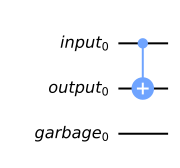

In [2]:
input_bit = QuantumRegister(1, 'input')
output_bit = QuantumRegister(1, 'output')
garbage_bit = QuantumRegister(1, 'garbage')

Uf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Uf.cx(input_bit[0], output_bit[0])

Uf.draw()

$V_f$는 가비지를 위해 입력의 복사본을 만들어야 하므로 다음과 같이 2개의 `cx` 게이트를 사용할 수 있습니다.

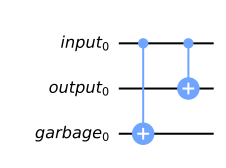

In [3]:
Vf = QuantumCircuit(input_bit, output_bit, garbage_bit)
Vf.cx(input_bit[0], garbage_bit[0])
Vf.cx(input_bit[0], output_bit[0])
Vf.draw()

이제 $U_f$를 먼저 적용한 다음 $V_f^{\dagger}$를 적용했을 때의 효과를 살펴볼 수 있습니다. 순 효과(net effect)는 다음의 회로입니다.

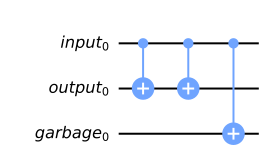

In [4]:
qc = Uf + Vf.inverse()
qc.draw()

이 회로는 서로의 영향이 서로 상쇄되는 2개의 동일한 `cx` 게이트로 시작합니다. 남은 것은 입력과 가비지 레지스터 사이에 있는 마지막 `cx` 게이트 입니다. 수학적으로는 다음을 의미합니다.

$$ V_f^\dagger U_f \left| x,0,0 \right\rangle = V_f^\dagger \left| x,f(x),0 \right\rangle = \left| x , 0 ,g(x) \right\rangle $$

여기서 $V_f^\dagger$의 역할은 단순히 초기 상태로 돌리는 것이 아닌, 첫 번째 큐비트를 원치 않는 가비지와 얽힌 채로 남기는 것입니다. 따라서 필요한 상태가 아니기 때문에 알고리즘의 다음 단계는 예상대로 실행되지 않을 것 입니다.

이러한 이유로 양자 알고리즘에서 고전적인 가비지를 제거하는 방법이 필요합니다. 'uncomputation'으로 알려진 방법을 활용할 수 있습니다. 다른 빈 변수를 가져와서  $V_f$를 적용하기만 하면 됩니다.

$$ \left| x, 0, 0, 0 \right\rangle \rightarrow \left| x,f(x),g(x),0 \right\rangle $$

그런 다음 제어 반전 게이트 집합을 적용합니다. 각 게이트는 출력을 부호화하는 큐비트 중 하나가 제어하고 여분의 빈 변수에 상응하는 큐비트를 대상으로 합니다.

다음은 단일 큐비트 레지스터를 이용해서 앞선 예를 수행하는 회로입니다.

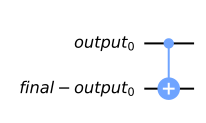

In [5]:
final_output_bit = QuantumRegister(1, 'final-output')

copy = QuantumCircuit(output_bit, final_output_bit)
copy.cx(output_bit, final_output_bit)

copy.draw()

이 회로의 효과는 정보를 복제하는 것입니다. 복제 불가 정리(no-cloning theorem)을 들어 봤다면 이것은 같은 프로세스가 아닙니다. 구체적으로 다음 방식으로 상태를 변환합니다.

$$ \left| x,f(x),g(x),0 \right\rangle \rightarrow \left| x,f(x),g(x),f(x) \right\rangle. $$

끝으로 원래의 계산을 되돌리는 $V_f^\dagger$를 적용합니다.

$$ \left| x,f(x),g(x),0 \right\rangle \rightarrow \left| x,0,0,f(x) \right\rangle $$

그럼에도 불구하고 복사된 출력은 남아 있습니다. 순 효과는 가비지 없이 계산을 수행하고 원하는 $U_f$를 만드는 것입니다.

$f(x) = x$인 단일 큐비트 레지스터를 사용하는 예제의 경우 전체 과정은 다음 회로와 같습니다.

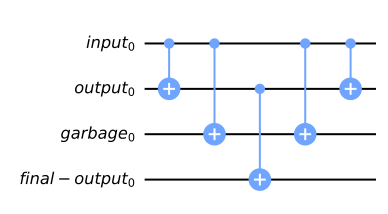

In [6]:
(Vf.inverse() + copy + Vf).draw()

`cx` 게이트의 동작에 대해 지금까지 알고 있는 것을 활용해서 가비지 레지스터에 적용된 두 게이트가 서로를 상쇄하는 것을 이해할 수 있어야 합니다. 이제 성공적으로 가비지를 제거했습니다.

### 빠른 연습문제

1. '출력' 레지스터가 $|0\rangle$로 초기화될 때, 출력이 올바르게 '최종 출력' 레지스터에만 쓰여졌는지 보이시오.
2. '출력' 레지스터가 $|1\rangle$ 로 초기화될 때 어떤 일이 발생하는지 밝히십시오.

이 방법과 이 장에서 다룬 모든 방법들로 양자 알고리즘 생성에 필요한 모든 도구를 갖게 되었습니다. 이제 이러한 알고리즘의 동작을 이해할 수 있을 것입니다.

In [7]:
import qiskit.tools.jupyter
%qiskit_version_table